# Projet STATISTIQUES - Étude de données météo

Groupe : Choquet Laura, Oncle Valentin, Laisné Paul, Maubian Joséphine, Regaieg Mohamed

## Exploration et présentation des données

Les données utilisées dans ce projet sont des données météorologiques provenant de la source suivante : 
https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/exports/csv?lang=fr&qv1=(date%3A%5B2015-08-03T22%3A00%3A00Z%20TO%202025-09-03T21%3A59%3A59Z%5D)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B


In [2]:
# Chargement du jeu de données
data <- read.csv("../data/station_7005_obs.csv", sep = ",") # Remplacer le lien par celui de votre jeu de données.

In [3]:
# Informations générales 
cat(strrep("-", 50), "\n")
cat("Dimension du dataset\n")
cat(strrep("-", 50), "\n")
dim_data <- dim(data)
cat("Nb d'observations :", dim_data[1], "\n")
cat("Nb de variables :", dim_data[2], "\n")
cat(strrep("-", 50), "\n")
cat("Liste des variables :\n")
cat(strrep("-", 50), "\n")
print(names(data))
# cat(strrep("-", 50), "\n")
# cat("Summary of the dataset\n")
# cat(strrep("-", 50), "\n")
# print(summary(data))


-------------------------------------------------- 


Dimension du dataset
-------------------------------------------------- 
Nb d'observations : 29191 
Nb de variables : 62 
-------------------------------------------------- 
Liste des variables :
-------------------------------------------------- 
 [1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                 

La sortie de la fonction summary() nous permet au préalable de constater que pour certaines variables il y a énormément de données manquantes. Afin d'avoir une meilleure visibilité sur le jeu de données et de réduire le nombre de variables sur lesquelles nous allons travaillé, nous avons d'abord écarté les variables non exploitables qui contiennent plus de 20 % de données manquantes.

-------------------------------------------------- 
Analyse des données manquantes (en pourcentage)
-------------------------------------------------- 
                                           ID.OMM.station 
                                                    0.000 
                                                     Date 
                                                    0.000 
                                   Pression.au.niveau.mer 
                                                    0.041 
                        Variation.de.pression.en.3.heures 
                                                    0.055 
                            Type.de.tendance.barométrique 
                                                    0.055 
                            Direction.du.vent.moyen.10.mn 
                                                    0.130 
                              Vitesse.du.vent.moyen.10.mn 
                                                    0.130 
                      

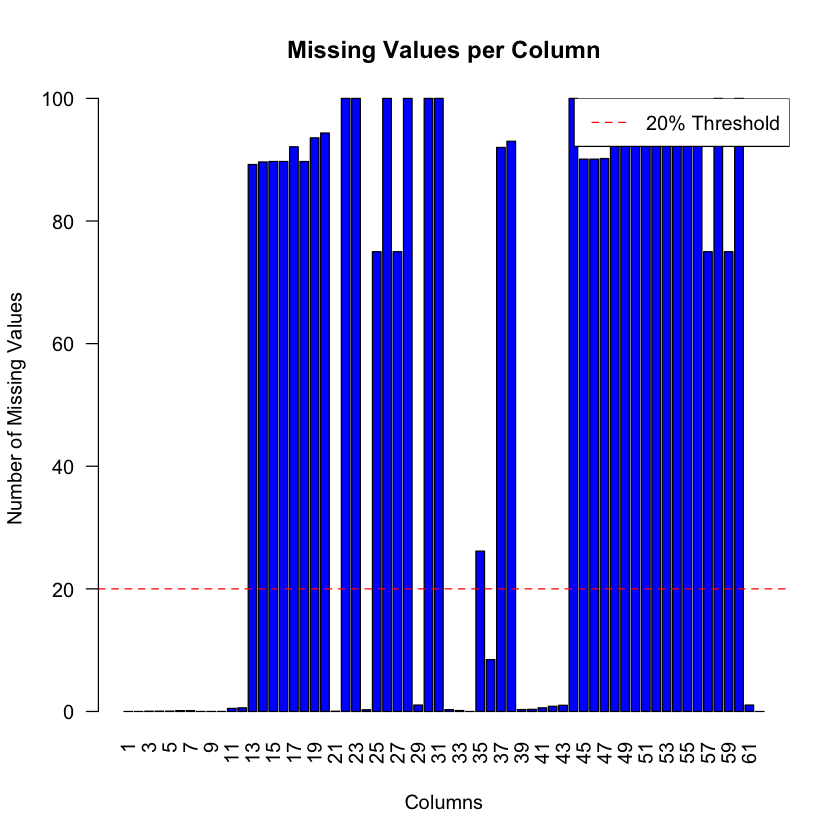

In [4]:
# Analyse des données manquantes (en pourcentage)
missing_values_percent <- colMeans(is.na(data)) * 100
cat(strrep("-", 50), "\n")
cat("Analyse des données manquantes (en pourcentage)\n")
cat(strrep("-", 50), "\n")
print(round(missing_values_percent, 3))

# Affichage dans un histogramme des valeurs manquantes par colonne
par(bg = "white")
barplot(missing_values_percent, main = "Missing Values per Column", 
        xlab = "Columns", ylab = "Number of Missing Values", col = "blue", las = 2,
        names.arg = seq_along(missing_values_percent))
# Rajouter une ligne horizontale pour indiquer un seuil de tolérance
abline(h = 20, col = "red", lty = 2)
legend("topright", legend = "20% Threshold", col = "red", lty = 2)


In [5]:
# Suppression de colonnes avec plus de 20% de données manquantes
threshold_ratio <- 0.2
threshold <- threshold_ratio * nrow(data)
missing_values <- colSums(is.na(data))
columns_to_drop <- names(missing_values[missing_values > threshold])
data_cleaned <- data[, !(names(data) %in% columns_to_drop)]
cat(strrep("-", 50), "\n")
cat("Colonnes supprimées (plus de 20% de données manquantes) :\n")
cat(strrep("-", 50), "\n")
print(columns_to_drop)
cat(strrep("-", 50), "\n")
cat("Dimension du dataset après suppression des colonnes :\n")
cat(strrep("-", 50), "\n")
dim_data_cleaned <- dim(data_cleaned)
cat("Nb d'observations :", dim_data_cleaned[1], "\n")
cat("Nb de variables :", dim_data_cleaned[2], "\n")
cat(strrep("-", 50), "\n")
cat("Liste des variables après nettoyage :\n")
print(names(data_cleaned))

-------------------------------------------------- 
Colonnes supprimées (plus de 20% de données manquantes) :
-------------------------------------------------- 
 [1] "Temps.passé.1"                                       
 [2] "Temps.passé.2"                                       
 [3] "Nebulosité.totale"                                   
 [4] "Nébulosité..des.nuages.de.l..étage.inférieur"        
 [5] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"  
 [6] "Type.des.nuages.de.l.étage.inférieur"                
 [7] "Type.des.nuages.de.l.étage.moyen"                    
 [8] "Type.des.nuages.de.l.étage.supérieur"                
 [9] "Niveau.barométrique"                                 
[10] "Géopotentiel"                                        
[11] "Température.minimale.sur.12.heures"                  
[12] "Température.minimale.sur.24.heures"                  
[13] "Température.maximale.sur.12.heures"                  
[14] "Température.maximale.sur.24.heures"                 

In [6]:
station <- unique(data_cleaned$ID.OMM.station)
print(length(station))

[1] 1


In [6]:
# Récupération des variables numériques
# On considère les variables date, ID.OMM.station comme catégorielle
categorical_var = c("Date", "ID.OMM.station")
data_numeric <- data_cleaned[, !(names(data_cleaned) %in% categorical_var)]

cat(strrep("-", 50), "\n")
cat("Variables numériques :\n")
cat(strrep("-", 50), "\n")
cat("Nb de variables :", length(names(data_numeric)), "\n")
print(names(data_numeric))
cat(strrep("-", 50), "\n")


-------------------------------------------------- 
Variables numériques :
-------------------------------------------------- 
Nb de variables : 24 
 [1] "Pression.au.niveau.mer"                                   
 [2] "Variation.de.pression.en.3.heures"                        
 [3] "Type.de.tendance.barométrique"                            
 [4] "Direction.du.vent.moyen.10.mn"                            
 [5] "Vitesse.du.vent.moyen.10.mn"                              
 [6] "Température"                                              
 [7] "Point.de.rosée"                                           
 [8] "Humidité"                                                 
 [9] "Visibilité.horizontale"                                   
[10] "Temps.présent"                                            
[11] "Pression.station"                                         
[12] "Variation.de.pression.en.24.heures"                       
[13] "Température.minimale.du.sol.sur.12.heures"                
[14] "

Indices et noms des colonnes :
1 : Pression.au.niveau.mer 
2 : Variation.de.pression.en.3.heures 
3 : Type.de.tendance.barométrique 
4 : Direction.du.vent.moyen.10.mn 
5 : Vitesse.du.vent.moyen.10.mn 
6 : Température 
7 : Point.de.rosée 
8 : Humidité 
9 : Visibilité.horizontale 
10 : Temps.présent 
11 : Pression.station 
12 : Variation.de.pression.en.24.heures 
13 : Température.minimale.du.sol.sur.12.heures 
14 : Rafale.sur.les.10.dernières.minutes 
15 : Rafales.sur.une.période 
16 : Periode.de.mesure.de.la.rafale 
17 : Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol 
18 : Précipitations.dans.la.dernière.heure 
19 : Précipitations.dans.les.3.dernières.heures 
20 : Précipitations.dans.les.6.dernières.heures 
21 : Précipitations.dans.les.12.dernières.heures 
22 : Précipitations.dans.les.24.dernières.heures 
23 : Température.minimale.du.sol.sur.12.heures..en..C. 
24 : mois_de_l_annee 


corrplot 0.95 loaded


Attachement du package : ‘corrplot’


L'objet suivant est masqué depuis ‘package:pls’:

    corrplot


Warning message in cor(data_numeric, use = "pairwise.complete.obs"):
“l'écart type est nul”


-------------------------------------------------- 
10 paires de variables les plus corrélées :
-------------------------------------------------- 
1. Température.minimale.du.sol.sur.12.heures et Température.minimale.du.sol.sur.12.heures..en..C. : 1
2. Pression.au.niveau.mer et Pression.station : 1
3. Rafale.sur.les.10.dernières.minutes et Rafales.sur.une.période : 0.962
4. Vitesse.du.vent.moyen.10.mn et Rafale.sur.les.10.dernières.minutes : 0.936
5. Vitesse.du.vent.moyen.10.mn et Rafales.sur.une.période : 0.899
6. Point.de.rosée et Température.minimale.du.sol.sur.12.heures..en..C. : 0.891
7. Point.de.rosée et Température.minimale.du.sol.sur.12.heures : 0.891
8. Température et Point.de.rosée : 0.843
9. Température et Température.minimale.du.sol.sur.12.heures : 0.829
10. Température et Température.minimale.du.sol.sur.12.heures..en..C. : 0.829
-------------------------------------------------- 


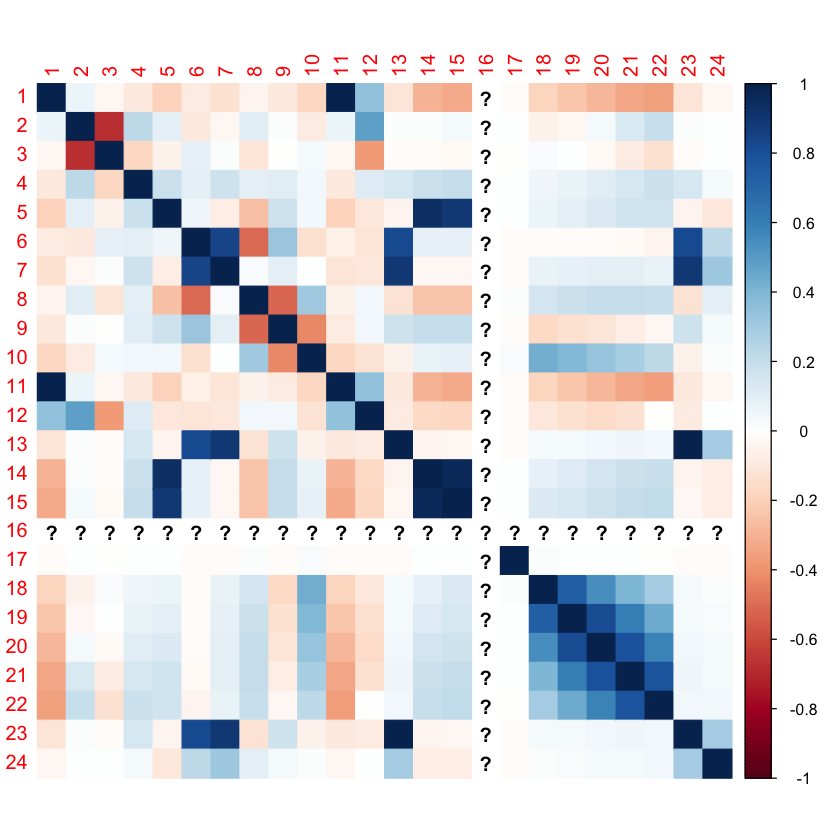

In [8]:
# Affichage graphique de la matrice de corrélation
# Afficher les indices et les noms des colonnes
cat("Indices et noms des colonnes :\n")
for (i in seq_along(names(data_numeric))) {
    cat(i, ":", names(data_numeric)[i], "\n")
}
# Remplacer les noms des colonnes par leurs indices dans la matrice de corrélation
library(corrplot)
par(bg = "white")

cor_matrix <- cor(data_numeric, use = "pairwise.complete.obs")
colnames(cor_matrix) <- rownames(cor_matrix) <- seq_len(ncol(cor_matrix))
corrplot(cor_matrix, method = "color")

# Print les 5 paires de variables les plus corrélées
cor_matrix[lower.tri(cor_matrix, diag = TRUE)] <- NA
cor_values <- as.data.frame(as.table(cor_matrix))
cor_values <- na.omit(cor_values)
cor_values <- cor_values[order(-abs(cor_values$Freq)), ]
cat(strrep("-", 50), "\n")
cat("10 paires de variables les plus corrélées :\n")
cat(strrep("-", 50), "\n")
for (i in 1:10) {
    var1_index <- cor_values[i, 1]
    var2_index <- cor_values[i, 2]
    var1_name <- names(data_numeric)[as.numeric(var1_index)]
    var2_name <- names(data_numeric)[as.numeric(var2_index)]
    cat(paste0(i, ". ", var1_name, " et ", var2_name, " : ", round(cor_values[i, 3], 3), "\n"))
}
cat(strrep("-", 50), "\n")

In [ ]:
# Boxplot pour chaque variable numérique
options(repr.plot.width = 12, repr.plot.height = 8) # Agrandir la taille de la figure pour Jupyter
for (var in names(data_numeric)) {
    par(bg = "white")
    boxplot(data_numeric[[var]], main = var, col = "lightblue")
}


In [77]:
data_by_station <- split(data_cleaned, data_cleaned$ID.OMM.station)

for (station_id in names(data_by_station)) {
    cat(strrep("-", 50), "\n")
    cat("Station :", station_id, "\n")
    cat("Nb d'observations :", nrow(data_by_station[[station_id]]), "\n")
}

-------------------------------------------------- 
Station : 7005 
Nb d'observations : 29191 
-------------------------------------------------- 
Station : 7015 
Nb d'observations : 29365 
-------------------------------------------------- 
Station : 7020 
Nb d'observations : 29041 
-------------------------------------------------- 
Station : 7027 
Nb d'observations : 29208 
-------------------------------------------------- 
Station : 7037 
Nb d'observations : 29375 
-------------------------------------------------- 
Station : 7072 
Nb d'observations : 29387 
-------------------------------------------------- 
Station : 7110 
Nb d'observations : 29327 
-------------------------------------------------- 
Station : 7117 
Nb d'observations : 29106 
-------------------------------------------------- 
Station : 7130 
Nb d'observations : 29361 
-------------------------------------------------- 
Station : 7139 
Nb d'observations : 29179 
--------------------------------------------------

In [9]:
# Suppression des observations avec des valeurs manquantes
data_final <- na.omit(data_cleaned)
cat(strrep("-", 50), "\n")
cat("Dimension du dataset après suppression des observations avec des valeurs manquantes :\n")
cat(strrep("-", 50), "\n")
dim_data_final <- dim(data_final)
cat("Nb d'observations :", dim_data_final[1], "\n")
cat("Nb de variables :", dim_data_final[2], "\n")
cat(strrep("-", 50), "\n")
cat("Liste des variables après suppression des observations avec des valeurs manquantes :\n")
cat(strrep("-", 50), "\n")
print(names(data_final)) 

-------------------------------------------------- 
Dimension du dataset après suppression des observations avec des valeurs manquantes :


-------------------------------------------------- 
Nb d'observations : 25961 
Nb de variables : 26 
-------------------------------------------------- 
Liste des variables après suppression des observations avec des valeurs manquantes :
-------------------------------------------------- 
 [1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                               

In [ ]:
data_by_station <- split(data_final, data_final$ID.OMM.station)

for (station_id in names(data_by_station)) {
    cat(strrep("-", 50), "\n")
    cat("Station :", station_id, "\n")
    cat("Nb d'observations :", nrow(data_by_station[[station_id]]), "\n")
}

In [16]:
# Boxplots pour une station spécifique (exemple : "7005") sauf altitude, latitude, longitude
station_id <- "7005"
station_data <- subset(data_final, ID.OMM.station == station_id)

# Exclure altitude, latitude, longitude si elles existent
exclude_vars <- c("Altitude", "Latitude", "Longitude")
numeric_vars <- setdiff(names(data_numeric), exclude_vars)
station_numeric <- station_data[, numeric_vars, drop = FALSE]

# options(repr.plot.width = 12, repr.plot.height = 8) # Agrandir la taille de la figure pour Jupyter
# for (var in names(station_numeric)) {
#     par(bg = "white")
#     boxplot(station_numeric[[var]], main = paste(var, "- Station", station_id), col = "lightblue")
# }



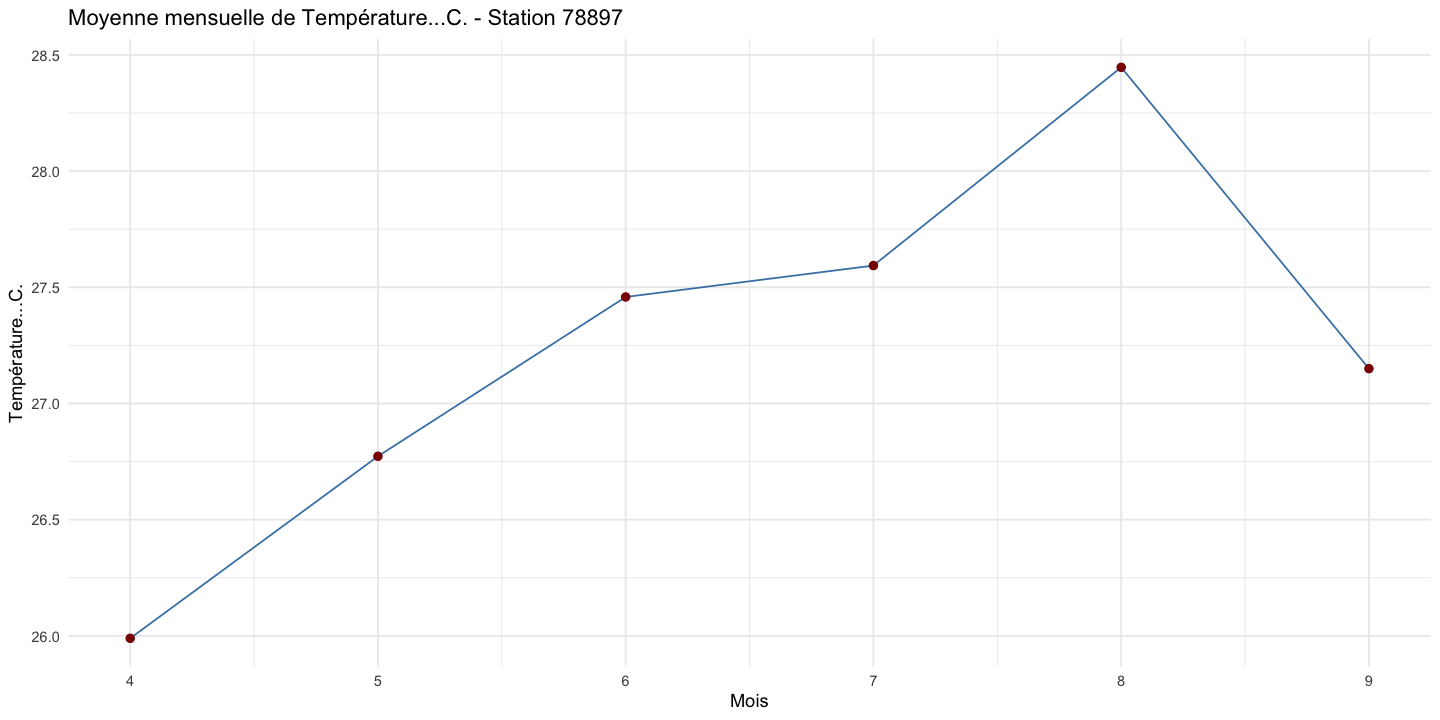

In [20]:
library(dplyr)
library(ggplot2)

plot_monthly_avg <- function(data, station_id, variable) {
  # Vérification que la colonne Date est bien en format datetime
  if (!inherits(data$Date, "POSIXct") && !inherits(data$Date, "Date")) {
    data$Date <- as.POSIXct(data$Date, tz = "UTC")
  }
  
  # Filtrer par station
  station_data <- data %>% 
    filter(ID.OMM.station == station_id)
  
  if (nrow(station_data) == 0) {
    message(paste("Aucune donnée trouvée pour la station", station_id))
    return(NULL)
  }
  
  # Vérifier si la variable existe
  if (!(variable %in% names(station_data))) {
    message(paste("La variable", variable, "n'existe pas dans le dataset."))
    return(NULL)
  }
  
  # Calcul des moyennes mensuelles (sans lubridate)
  monthly_avg <- station_data %>%
    mutate(Mois = as.integer(format(Date, "%m"))) %>%
    group_by(Mois) %>%
    summarise(valeur = mean(.data[[variable]], na.rm = TRUE))
  
  # Plot avec ggplot2
  ggplot(monthly_avg, aes(x = Mois, y = valeur)) +
    geom_line(color = "steelblue") +
    geom_point(size = 2, color = "darkred") +
    scale_x_continuous(breaks = 1:12) +
    labs(title = paste("Moyenne mensuelle de", variable, "- Station", station_id),
         x = "Mois",
         y = variable) +
    theme_minimal()
}
plot_monthly_avg(data_final, station_id = 78897, variable = "Température...C.")



## Calcul et étude d'un estimateur

## Tests sur un paramètre et ANOVA

## Régression et corrélation

## ACP et PLS

In [7]:
length(names(data_numeric))

[1] 24

Data: 	X dimension: 25961 23 
	Y dimension: 25961 1
Fit method: kernelpls
Number of components considered: 23

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           6.283    5.941    5.911    5.881    5.383    2.208   0.9747
adjCV        6.283    5.941    5.911    5.881    5.382    2.201   0.9746
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV      0.8325   0.8132   0.7328    0.7087    0.5170    0.5095    0.5087
adjCV   0.8325   0.8132   0.7328    0.7086    0.5167    0.5095    0.5087
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV       0.5084    0.5083    0.5083    0.5083    0.5083    0.5083    0.5083
adjCV    0.5084    0.5083    0.5083    0.5083    0.5082    0.5082    0.5082
       21 comps  22 comps  23 comps
CV       0.5092    0.5092    0.5092
adjCV    0.5091    0.5091    0.5091

TRAINING: % variance explained
   1 comps  2 comps  3 

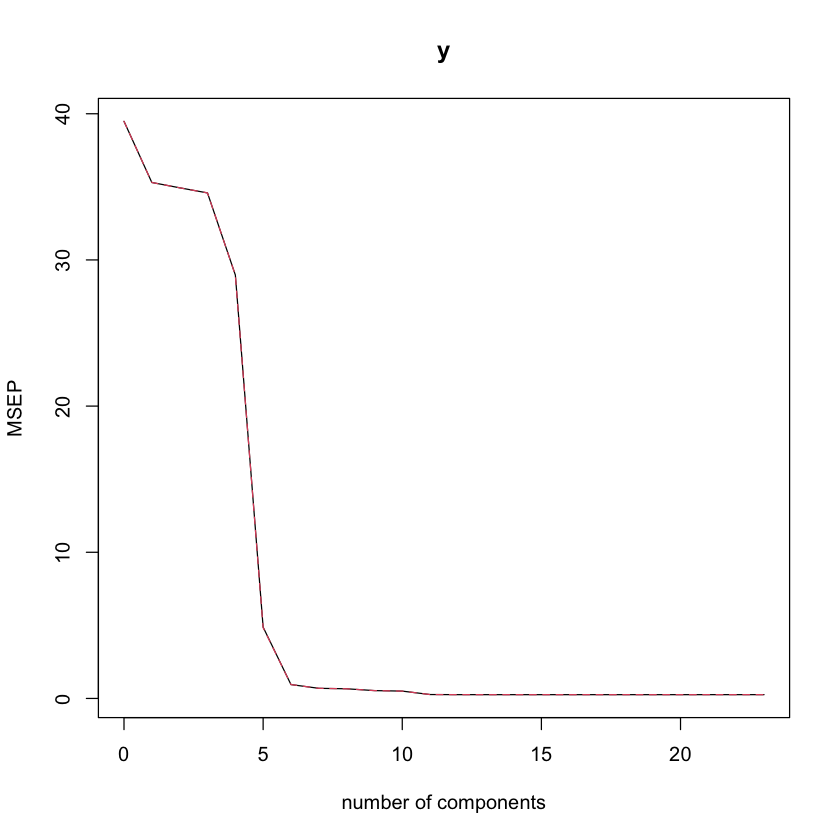

, , 20 comps

                                                                                  y
as.matrix(X)Pression.au.niveau.mer                                    -7.915370e-02
as.matrix(X)Variation.de.pression.en.3.heures                         -1.799959e-04
as.matrix(X)Type.de.tendance.barométrique                              1.147404e-02
as.matrix(X)Direction.du.vent.moyen.10.mn                              1.058330e-04
as.matrix(X)Vitesse.du.vent.moyen.10.mn                               -3.944422e-02
as.matrix(X)Point.de.rosée                                             7.631597e-01
as.matrix(X)Humidité                                                  -1.774056e-01
as.matrix(X)Visibilité.horizontale                                    -2.383802e-05
as.matrix(X)Temps.présent                                              2.070815e-03
as.matrix(X)Pression.station                                           7.985405e-02
as.matrix(X)Variation.de.pression.en.24.heures                         1.255055e-05
as.matrix(X)Température.minimale.du.sol.sur.12.heures                 -8.465618e-04
as.matrix(X)Rafale.sur.les.10.dernières.minutes                        1.096749e-02
as.matrix(X)Rafales.sur.une.période                                   -1.015633e-02
as.matrix(X)Periode.de.mesure.de.la.rafale                             0.000000e+00
as.matrix(X)Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol  5.177492e-04
as.matrix(X)Précipitations.dans.la.dernière.heure                     -3.086904e-02
as.matrix(X)Précipitations.dans.les.3.dernières.heures                 1.516717e-02
as.matrix(X)Précipitations.dans.les.6.dernières.heures                 7.571945e-03
as.matrix(X)Précipitations.dans.les.12.dernières.heures                7.295016e-03
as.matrix(X)Précipitations.dans.les.24.dernières.heures                2.653651e-03
as.matrix(X)Température.minimale.du.sol.sur.12.heures..en..C.         -8.465618e-04
as.matrix(X)mois_de_l_annee                                            5.219717e-03

NULL

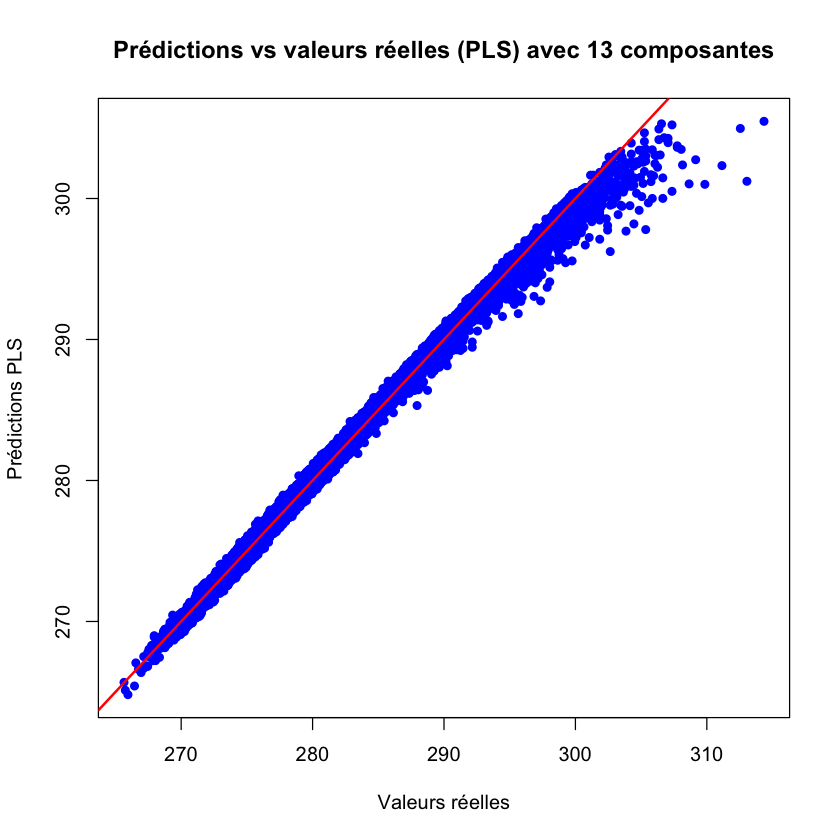

In [ ]:
library(pls)

# Utiliser le nom exact de la variable cible
target_var <- "Température"

# Créer un data.frame avec toutes les variables nécessaires
df_pls <- data_numeric[, c(target_var, setdiff(names(data_numeric), target_var))]
df_pls <- na.omit(df_pls) # Retirer toutes les lignes avec NA

y <- df_pls[[target_var]]
X <- df_pls[, setdiff(names(df_pls), target_var), drop = FALSE]

# Régression PLS avec validation croisée
pls_model <- plsr(y ~ as.matrix(X), validation = "CV")

# Résumé du modèle
summary(pls_model)

# Sélection du nombre optimal de composantes
par(bg = 'white')
validationplot(pls_model, val.type = "MSEP")

# Trouver le nombre optimal de composantes
opt_ncomp <- which.min(pls_model$validation$PRESS)

ncomp = 13

# Prédictions
pred <- predict(pls_model, ncomp = ncomp)
pred_vec <- as.vector(pred[,1,1])

# Plot prédiction vs ground truth
plot(y, pred_vec, 
     xlab = "Valeurs réelles", 
     ylab = "Prédictions PLS", 
     main = paste("Prédictions vs valeurs réelles (PLS) avec", ncomp, "composantes"), 
     col = "blue", pch = 16)
abline(a = 0, b = 1, col = "red", lwd = 2)

# Affichage des coefficients et les indices des variables dans X
coef(pls_model, ncomp = opt_ncomp)




## Clustering